<a href="https://colab.research.google.com/github/williamvnobrega/challenge-alura_store/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


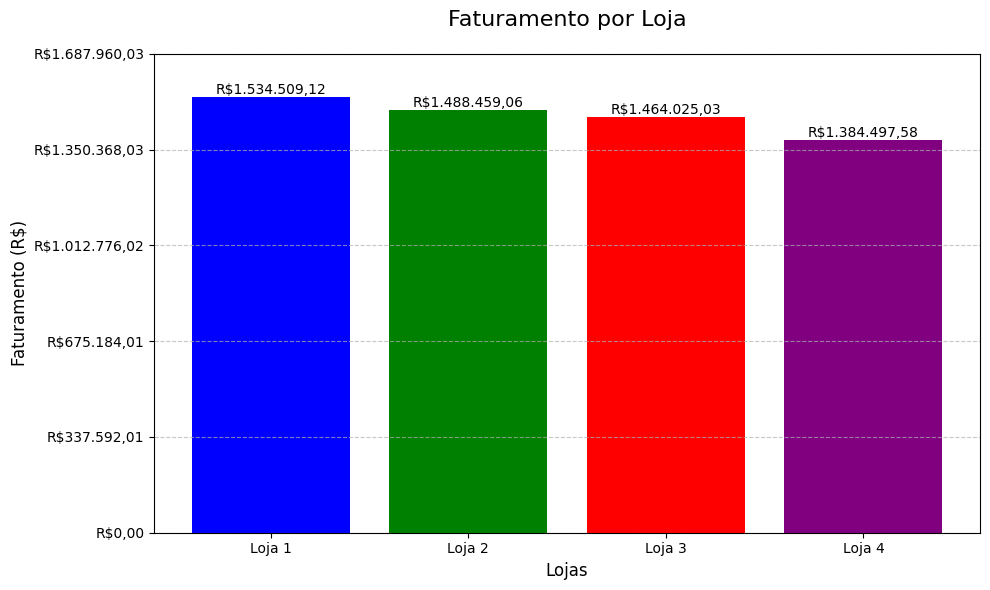

In [88]:
def calcular_faturamento(loja):
    return sum(loja.Preço)

faturamentos = [calcular_faturamento(loja),calcular_faturamento(loja2),calcular_faturamento(loja3),calcular_faturamento(loja4)]

lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']


plt.figure(figsize=(10, 6))
bars = plt.bar(lojas, faturamentos, color=['blue', 'green', 'red', 'purple'])

plt.title('Faturamento por Loja', fontsize=16, pad=20)
plt.xlabel('Lojas', fontsize=12)
plt.ylabel('Faturamento (R$)', fontsize=12)


def formatar_valores(valor):
    return f'R${valor:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')


max_value = max(faturamentos)
yticks = np.linspace(0, max_value * 1.1, 6)
plt.yticks(yticks)
ax = plt.gca()
ax.set_yticklabels([formatar_valores(y) for y in yticks])


for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,formatar_valores(height),ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


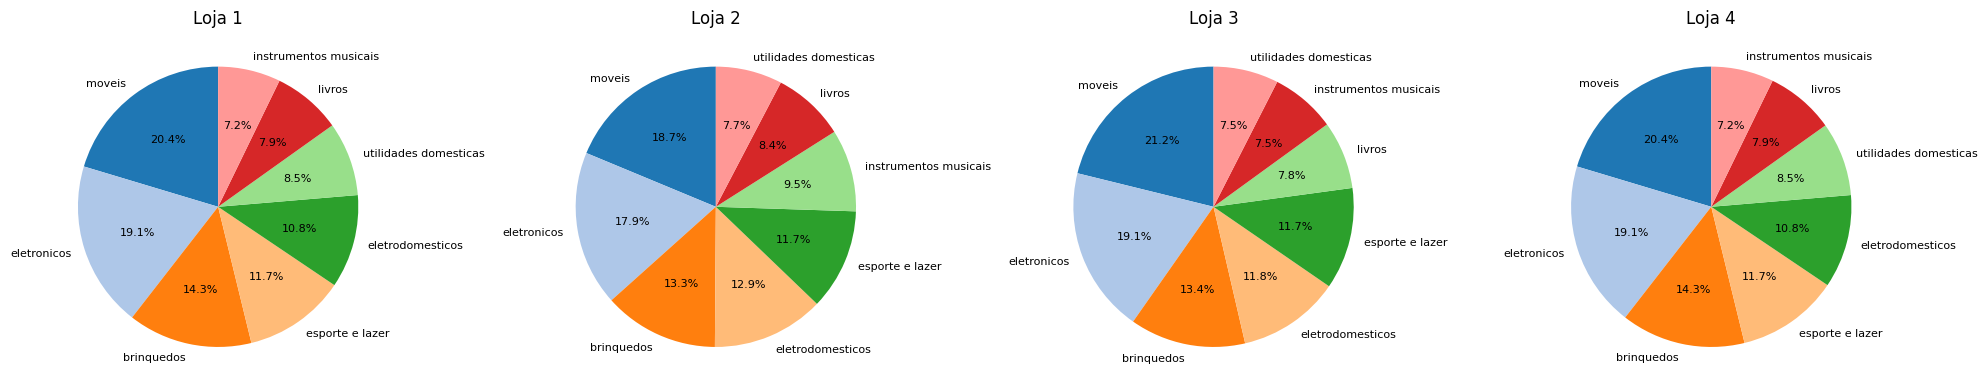

In [53]:
def vendas_por_categoria(loja):
    return loja['Categoria do Produto'].value_counts().rename_axis('Categoria').reset_index(name='Quantidade')

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
lojas = [(loja, "Loja 1"),(loja2, "Loja 2"),(loja3, "Loja 3"),(loja4, "Loja 4")]

for ax, (loja, nome) in zip(axes, lojas):
    vendas = vendas_por_categoria(loja)
    ax.pie(
        vendas['Quantidade'],
        labels=vendas['Categoria'],
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.tab20.colors,
        textprops={'fontsize': 8}
    )
    ax.set_title(nome, fontsize=12)

plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

In [16]:
def media_avaliacoes(loja):
   return  format(float((loja['Avaliação da compra'].mean())),'.2f')

print(f'Média de avaliação Loja 1: {media_avaliacoes(loja)}')
print(f'Média de avaliação Loja 2: {media_avaliacoes(loja2)}')
print(f'Média de avaliação Loja 3: {media_avaliacoes(loja3)}')
print(f'Média de avaliação Loja 4: {media_avaliacoes(loja4)}')



Média de avaliação Loja 1: 3.98
Média de avaliação Loja 2: 4.04
Média de avaliação Loja 3: 4.05
Média de avaliação Loja 4: 4.00


# 4. Produtos Mais e Menos Vendidos

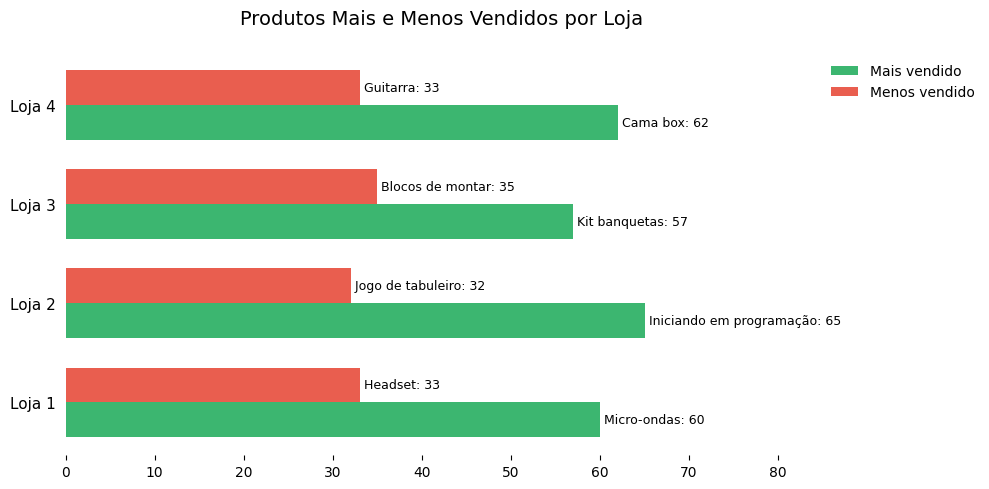

In [87]:
lojas = [loja, loja2, loja3, loja4]
nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

mais_vendidos = [loja['Produto'].describe()['top'] for loja in lojas]
freq_mais = [loja['Produto'].describe()['freq'] for loja in lojas]
menos_vendidos = [loja['Produto'].value_counts().idxmin() for loja in lojas]
freq_menos = [loja['Produto'].value_counts().min() for loja in lojas]

fig, ax = plt.subplots(figsize=(10, 5))

for spine in ax.spines.values():
    spine.set_visible(False)

y_pos = np.arange(len(nomes_lojas))
bar_height = 0.35

plt.style.use('default')
plt.rcParams['axes.facecolor'] = 'white'
verde = '#27ae60'
vermelho = '#e74c3c'

ax.barh(y_pos - bar_height/2, freq_mais, bar_height, color=verde, alpha=0.9, label='Mais vendido')
ax.barh(y_pos + bar_height/2, freq_menos, bar_height, color=vermelho, alpha=0.9, label='Menos vendido')


for i, (mv, mv_freq, lv, lv_freq) in enumerate(zip(mais_vendidos, freq_mais, menos_vendidos, freq_menos)):
    ax.text(mv_freq, i - bar_height/2, f' {mv}: {mv_freq} ', va='center', ha='left', color='black', fontsize=9)
    ax.text(lv_freq, i + bar_height/2, f' {lv}: {lv_freq} ', va='center', ha='left', color='black', fontsize=9)


ax.set_yticks(y_pos)
ax.set_yticklabels(nomes_lojas, fontsize=11)
ax.tick_params(left=False)
ax.set_xlim(0, max(freq_mais) * 1.3)


plt.title('Produtos Mais e Menos Vendidos por Loja', pad=20, fontsize=14)
ax.legend(frameon=False, bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 5. Frete Médio por Loja


In [23]:
def frete_medio(loja):
  return format(float((loja['Frete'].mean())),'.2f')

print(f'Custo médio de frete da Loja 1: {frete_medio(loja)}')
print(f'Custo médio de frete da Loja 2: {frete_medio(loja2)}')
print(f'Custo médio de frete da Loja 3: {frete_medio(loja3)}')
print(f'Custo médio de frete da Loja 4: {frete_medio(loja4)}')


Custo médio de frete da Loja 1: 34.69
Custo médio de frete da Loja 2: 33.62
Custo médio de frete da Loja 3: 33.07
Custo médio de frete da Loja 4: 31.28


# Relatório Final

O objetivo desta análise é auxiliar Seu João a avaliar o desempenho de suas quatro lojas e, com base nos dados, decidir qual delas deve ser vendida.

Segundo os dados levantados, a Loja 4 apresentou o menor faturamento entre as quatro, com um valor 10% inferior ao da Loja 1, que lidera em receita. Além disso, a Loja 4 tem desempenho abaixo em categorias estratégicas, como eletrodomésticos e móveis.

A Loja 1, embora tenha a pior avaliação (3,98), mantém o maior faturamento, e seu custo de frete não é significativamente mais alto. Já a Loja 4, além do baixo desempenho financeiro, não apresenta vantagens competitivas em outros critérios: seu frete mais barato não se reflete em maior faturamento, e sua avaliação média (4,00) não se destaca.

Portanto, a Loja 4 é a que apresenta os piores indicadores para se manter no negócio, sendo a melhor candidata para venda.